<a href="https://colab.research.google.com/github/fairuznajla/IPOSS_PalmOilAnalytics/blob/main/Clustering%20CPO%20(Crude%20Palm%20Oil)%20Export%202022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["seaborn"])

<ipython-input-3-83529265c05f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use(["seaborn"])


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ekspor_cpo.csv')
data

,negara_tujuan,volume_ekspor,nilai_ekspor,tahun,deskripsi_hs
0,China,2095,2577,2022,CPO
1,Cote D’Ivoire,2000,1830,2022,CPO
2,France,32500,44196,2022,CPO
3,Germany,6000,5641,2022,CPO
4,India,2883818,2850988,2022,CPO
5,Italy,145163,141204,2022,CPO
6,Kenya,88397,85457,2022,CPO
7,Malaysia,97126,90322,2022,CPO
8,Malta,5000,4370,2022,CPO
9,Morocco,7499,6399,2022,CPO


# Data Understanding : Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   negara_tujuan  18 non-null     object
 1   volume_ekspor  18 non-null     int64 
 2   nilai_ekspor   18 non-null     int64 
 3   tahun          18 non-null     int64 
 4   deskripsi_hs   18 non-null     object
dtypes: int64(3), object(2)
memory usage: 848.0+ bytes


In [ ]:
# Dataset Shape
data.shape

(18, 5)

## Descriptive Statistics

In [ ]:
# Numerik
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tahun,78.0,2021.000000,0.821781,2020.0,2020.0,2021.0,2022.0,2022.0
volume_ekspor_negara_tujuan,51.0,258229.254902,764001.428080,63.0,3397.5,19999.0,93591.0,4390671.0


In [ ]:
!pip install dython
from dython.nominal import associations

# Data Preparation

##  Data Preprocessing and Data Cleaning

In [ ]:
# Menghapus kolom yang tidak dibutuhkan

data = data.drop(['nilai_ekspor', 'tahun', 'deskripsi_hs'], axis=1)

In [ ]:
data

,negara_tujuan,volume_ekspor
0,China,2095
1,Cote D’Ivoire,2000
2,France,32500
3,Germany,6000
4,India,2883818
5,Italy,145163
6,Kenya,88397
7,Malaysia,97126
8,Malta,5000
9,Morocco,7499


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Pisahkan tipe datanya menjadi numerical dan categorical
num_cols = data.select_dtypes(include=['float', 'int']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print(f"Numerical Columns\t({len(num_cols)})\t: {list(num_cols)}")
print(f"Categorical Columns\t({len(cat_cols)})\t: {list(cat_cols)}")

Numerical Columns	(1)	: ['volume_ekspor']
Categorical Columns	(1)	: ['negara_tujuan']


In [ ]:
data_categ = data[cat_cols]
for i in cat_cols:
    Lenc = LabelEncoder()
    data_categ[i] = Lenc.fit_transform(data_categ[i])
    data[i] = data_categ[i]

<ipython-input-14-227d484c7752>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_categ[i] = Lenc.fit_transform(data_categ[i])


In [ ]:
data

,negara_tujuan,volume_ekspor
0,0,2095
1,1,2000
2,2,32500
3,3,6000
4,4,2883818
5,5,145163
6,6,88397
7,7,97126
8,8,5000
9,9,7499


# K-Means Clustering Modelling

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [ ]:
# Menentukan variabel untuk clustering
X = data[['negara_tujuan', 'volume_ekspor']]

In [ ]:
# Standardisasi variabel numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['negara_tujuan'])
    ],
    remainder='passthrough'
)

In [ ]:
# Membangun pipeline dengan KMeans
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=26))
])

In [ ]:
# Menghitung inersia untuk berbagai jumlah cluster
inertia_values = []
for k in range(1, 11):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(X)
    inertia_values.append(pipeline.named_steps['kmeans'].inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

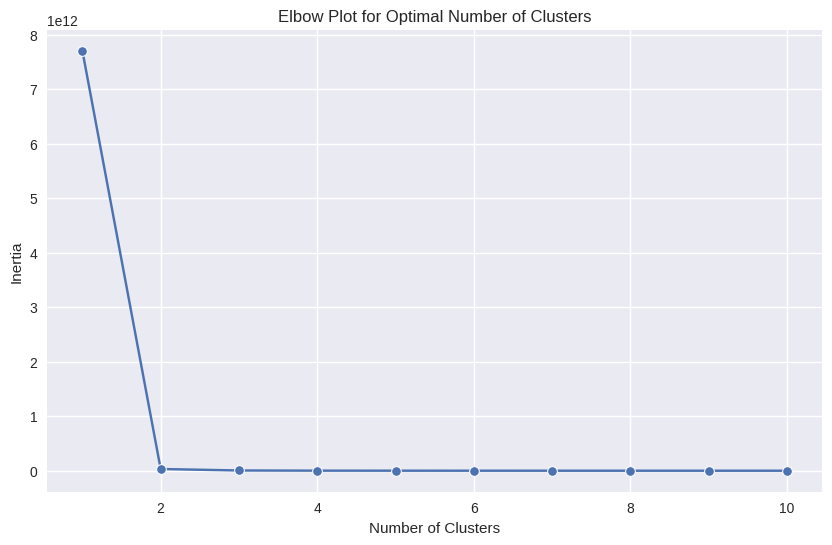

In [ ]:
# Menampilkan plot elbow
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia_values, marker='o')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Pilih jumlah cluster berdasarkan elbow di plot
optimal_clusters = 3

In [ ]:
# Melakukan clustering dengan jumlah cluster optimal
pipeline.set_params(kmeans__n_clusters=optimal_clusters)
pipeline.fit(X)
data['cluster_kmeans'] = pipeline.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menampilkan hasil clustering
print(data)

    negara_tujuan  volume_ekspor  cluster_kmeans
0               0           2095               2
1               1           2000               2
2               2          32500               2
3               3           6000               2
4               4        2883818               1
5               5         145163               0
6               6          88397               0
7               7          97126               0
8               8           5000               2
9               9           7499               2
10             10           6499               2
11             11          81665               0
12             12          15000               2
13             13           2475               2
14             14           5000               2
15             15           3003               2
16             16          64939               0
17             17           7499               2


K-Means Clustering
0 : sedang
1 : tinggi
2 : rendah

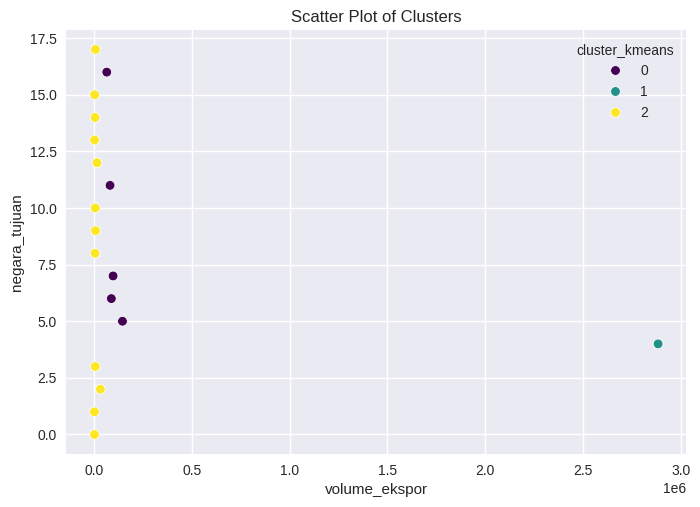

In [ ]:
# Visualisasi clusters menggunakan scatter plot
sns.scatterplot(x='volume_ekspor', y='negara_tujuan', hue='cluster_kmeans', data=data, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.show()

## Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

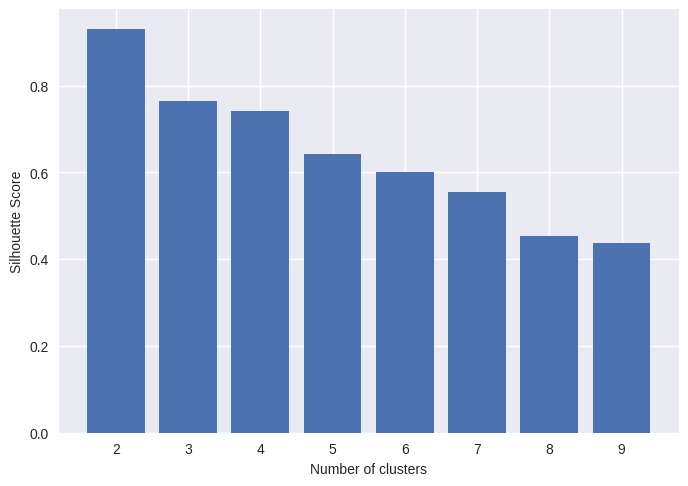

In [ ]:
# Semakin tinggi nilai silhoutte maka nilai clusternya makin baik
silhouette_scores = []

for n_cluster in range(2,10):
    silhouette_scores.append(
        silhouette_score(data, KMeans(n_clusters = n_cluster).fit_predict(data)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

# Hierarchical/Agglomerative Clustering Modelling

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns #melakukan plot variable dalam bentuk diagram batang
from sklearn.cluster import AgglomerativeClustering #untuk melakukan hierarchiral clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score #untuk mengukur kualitas cluster
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler #untuk menyeragamkan nilai data
from sklearn.decomposition import PCA #untuk reduksi fitur data sehingga bisa divisualisasi 2 dimensi
from sklearn.metrics.pairwise import cosine_similarity

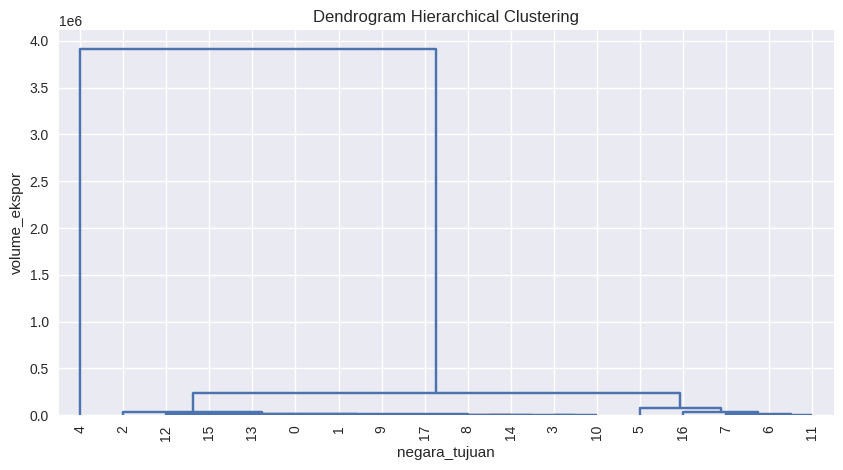

In [ ]:
# Plot dendogram, menghubungkan data-data yang jaraknya dekat dalam satu cluster
plt.figure(figsize=(10,5))
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('negara_tujuan')
plt.ylabel('volume_ekspor')
dendrogram(linkage(data,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10)
plt.show()

In [ ]:
# Agglomerative clustering dengan jumlah cluster = 3
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(data)
labels = agglo.labels_
hasil_agglo=pd.concat([data, pd.DataFrame({'cluster_hierarki':labels})], axis=1)
hasil_agglo

,negara_tujuan,volume_ekspor,cluster_kmeans,cluster_hierarki
0,0,2095,2,2
1,1,2000,2,2
2,2,32500,2,2
3,3,6000,2,2
4,4,2883818,1,1
5,5,145163,0,0
6,6,88397,0,0
7,7,97126,0,0
8,8,5000,2,2
9,9,7499,2,2


In [ ]:
# Assuming df is your DataFrame
hasil_agglo.to_csv('data_cluster.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('data_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Evaluation

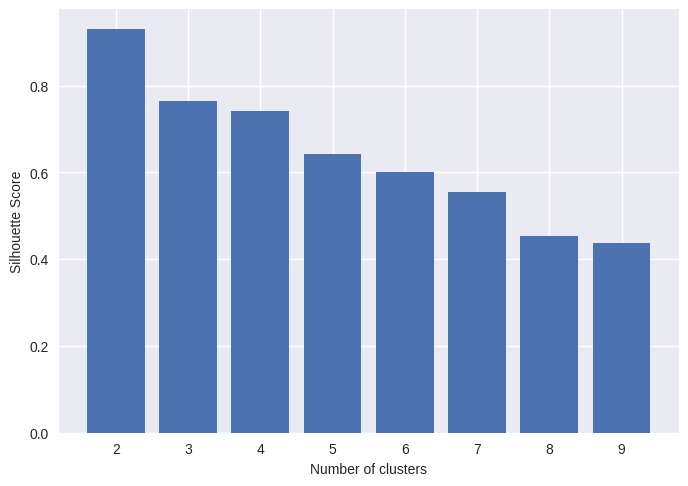

In [ ]:
# Mencari jumlah cluster terbaik dengan silhouette scores, disini untuk cluster 2 hingga 10. Semakin tinggi nilai silhoutte maka nilai clusternya makin baik
silhouette_scores = []

for n_cluster in range(2,10):
    silhouette_scores.append(
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data)))

plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()